In [9]:
import json
import pandas as pd
import numpy as np

# reading the JSON data using json.load()
file = 'clean_data_sub-Copy1.json'
with open(file) as train_file:
    dict_train = json.load(train_file)


In [51]:
import numpy as np
import ipywidgets as widgets
from IPython.display import clear_output, display
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

np.random.seed(42)

In [11]:
total=[]
for patient in dict_train:
    test1=[]
    for num in range (0,len(dict_train[patient])):
        test1.append(dict_train[patient][num]['ICD_9'])
    total.append(test1)

In [4]:
import gensim
from gensim.models import Word2Vec
model_ted = Word2Vec(sentences=total, size=100, window=20, min_count=1, workers=4, sg=1,iter=100)
#model_ted.wv.most_similar("80124")

In [1]:
my_dict = dict({})
for idx, key in enumerate(model_ted.wv.vocab):
    my_dict[key] = model_ted.wv[key]

NameError: name 'model_ted' is not defined

In [12]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
import numpy as np

In [13]:
## Section

In [131]:
mu_label = widgets.Label(value="similarPatients")
Patient_A = widgets.Text(description="Patient A", value="4579")
Patient_B = widgets.Text(description="Patient B", value="2080")
button = widgets.Button(description="Calculate")
widgets.VBox([mu_label,Patient_A,Patient_B,button])

In [125]:
def btn_eventhandler(obj):
    print(patient_similartiy,{'Patient_A': Patient_A.value, 'Patient_B': Patient_B.value})
button.on_click(btn_eventhandler)

In [32]:
## Column

In [55]:
#out = widgets.interactive_output(patient_similartiy, {'Patient_A': Patient_A, 'Patient_B': Patient_B})

In [85]:
out=widgets.Output()

In [113]:
def patient_similartiy(Patient_A,Patient_B):
    pa_icd=[]
    pb_icd=[]
    for event in range(0,len(dict_train[Patient_A])):
        icd=dict_train[Patient_A][event]['ICD_9']
        embedding=my_dict[icd]
        pa_icd.append(embedding)
    for event in range(0,len(dict_train[Patient_B])):
        icd=dict_train[Patient_B][event]['ICD_9']
        embedding=my_dict[icd]
        pb_icd.append(embedding)
    distance, path = fastdtw(pa_icd,pb_icd,dist=euclidean)
    index_a,index_b=zip(*path)
    plot=plt.plot(index_a,index_b, color='k', linewidth=2)
    return(distance,path,plot)

In [133]:
#def on_value_change(change):
    #Patient_A = Patient_A.value
    #Patient_B= Patient_B.value
#    out.clear_output()
#    with out:
#        display(patient_similartiy(Patient_A.value,Patient_B.value))

#def btn_eventhandler(obj):
#    return(patient_similartiy,{'Patient_A': Patient_A.value, 'Patient_B': Patient_B.value})

def on_button_clicked(change):
      # "linking function with output"
    out.clear_output()
    with out:
        # what happens when we press the button
        return(patient_similartiy(Patient_A.value,Patient_B.value))
Patient_A.observe(on_button_clicked, names="value")
Patient_B.observe(on_button_clicked, names="value")
button.on_click(on_button_clicked)


Output()

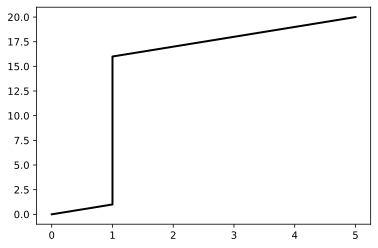

In [134]:
on_button_clicked(None)
out